In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston,make_regression

In [22]:
# Get or Create a dataset
X,y = make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

# Normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0 )
X = (X - u)/std

In [23]:
# Add a column of 1 for vectorization
one = np.ones((X.shape[0],1))
X = np.hstack((one,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [24]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y_ - y)**2)
    return e/m

def gradient(X,y,theta):
    grad = np.zeros((X.shape[1],))
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    return grad/X.shape[0]

def mini_batch_gradient_descent(X,y,batch_size=200,learning_rate=0.1,max_iters=100):
    theta = np.zeros((X.shape[1],))
    error_list = []
    data = np.hstack((X,y.reshape(-1,1)))
    for i in range(max_iters):

        # Mini batch Gradient descent
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size

        for a in range(total_batches):
            batch_data = data[a*batch_size : (a+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            batch_gradient =gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            error_list.append(error(x_batch,y_batch,theta))

    return theta,error_list

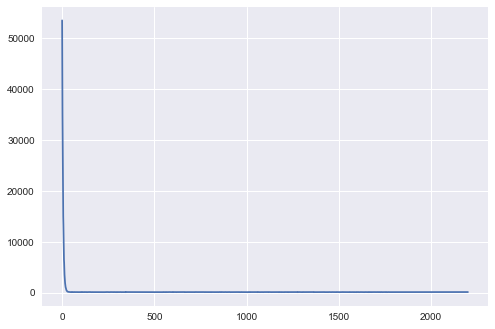

In [28]:
# Mini batch gradient descent
theta,error_list = mini_batch_gradient_descent(X,y,batch_size=450,max_iters=100)
plt.style.use('seaborn')
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()